# Feature selection 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
#upload a final dataframe
path= "C:/Users/dalit/DataScience/project/final_project/final_df_drop.csv"

In [3]:
### user pandas to read the csv (read_csv())
### show the top rows
final_df_drop = pd.read_csv(path)
final_df_drop.head()

,Unnamed: 0,Unnamed: 0.1,chl_pred_y_x,avg_g,std_g,am/pm,Sun_Declin_deg,Sunlight_Duration_minutes,True_Solar_Time _min,chl_change,...,significant_height_y,mean_period_y,T_round1_y,d_stamp1,hour,minute,T_round2,Sunrise_Time_LST,Sunset_Time_LST,T_round2_hour
0,0,0,0.036,24.538571,3.926277,0.0,19.34171,834.248455,733.260372,-0.035,...,0.350,3.569,00:00,26/07/2017,0,0,12:00,04:49:37,18:43:52,12
1,1,1,0.083,24.542857,3.972936,0.0,19.34171,834.248455,733.260372,-0.012,...,0.368,3.535,00:30,26/07/2017,0,30,12:30,04:49:37,18:43:52,12
2,2,2,0.060,24.651429,3.982476,1.0,19.34171,834.248455,733.260372,-0.023,...,0.383,3.632,01:00,26/07/2017,1,0,01:00,04:49:37,18:43:52,1
3,3,3,0.083,24.647143,4.040803,1.0,19.34171,834.248455,733.260372,-0.012,...,0.373,3.516,01:30,26/07/2017,1,30,01:30,04:49:37,18:43:52,1
4,4,4,0.048,24.677143,4.041587,1.0,19.34171,834.248455,733.260372,-0.059,...,0.344,3.570,02:00,26/07/2017,2,0,02:00,04:49:37,18:43:52,2


In [4]:
final_df_drop=final_df_drop.astype({"T_round2_hour":float})

In [5]:
list(final_df_drop)

['Unnamed: 0',
 'Unnamed: 0.1',
 'chl_pred_y_x',
 'avg_g',
 'std_g',
 'am/pm',
 'Sun_Declin_deg',
 'Sunlight_Duration_minutes',
 'True_Solar_Time _min',
 'chl_change',
 'chl_mov_avg',
 'L/D',
 'seasonality2',
 'trend2',
 'seasonality12',
 'trend12',
 'seasonality24',
 'trend24',
 'seasonality48',
 'trend48',
 'x',
 'd_stamp_x',
 'T_round1_x',
 'chl_pred_x',
 'g_14',
 'g_50',
 'g_59',
 'g_77',
 'g_86',
 'depth_103',
 'depth_85',
 'depth_127',
 'depth_95',
 'depth_129',
 'depth_99',
 'depth_89',
 'depth_91',
 'depth_131',
 'depth_115',
 'depth_83',
 'depth_121',
 'depth_97',
 'depth_101',
 'depth_93',
 'depth_125',
 'depth_87',
 'depth_117',
 'depth_123',
 'depth_119',
 'wind_speed',
 'north',
 'east',
 'magnitude_1',
 'magnitude_2',
 'gustdirection',
 'winddirection',
 'East_cm_s',
 'North_cm_s',
 'Abs_Speed_cm_s',
 'g_5',
 'g_68',
 'temp_avg',
 'depth_39',
 'depth_69',
 'depth_73',
 'depth_15',
 'depth_45',
 'depth_51',
 'depth_3',
 'depth_21',
 'depth_23',
 'depth_81',
 'depth_11',
 '

In [6]:
#removal of uneccecery features
final_df_drop = final_df_drop.drop(['Unnamed: 0',
 'Unnamed: 0.1', 'chl_pred_x','chl_pred_y_y'],axis=1)

In [7]:
final_df_drop=final_df_drop.drop(['T_round2', 'Sunrise_Time_LST',
 'Sunset_Time_LST','T_round1_y','d_stamp_x',
 'T_round1_x',
 'd_stamp1','x'],axis = 1)

# Univariable Analysis

In [8]:
from scipy import stats
from scipy.stats import spearmanr

In [9]:
df=final_df_drop

In [10]:

rho, pval=stats.spearmanr(df)


In [11]:
df.shape

(19289, 127)

In [12]:
pd.DataFrame(rho)
df=pd.DataFrame(rho.reshape(-1,127),
             columns=df.columns,
             index=df.columns)
df

,chl_pred_y_x,avg_g,std_g,am/pm,Sun_Declin_deg,Sunlight_Duration_minutes,True_Solar_Time _min,chl_change,chl_mov_avg,L/D,...,Temperature_DegC_y,Heading_DegM_y,SP_Std_cm_s_y,Direction_DegM_y,Max_Tilt_Deg_y,significant_height_y,mean_period_y,hour,minute,T_round2_hour
chl_pred_y_x,1.000000,-0.530637,-0.579458,0.005143,-0.677444,-0.677444,-0.087163,0.176473,0.862638,-0.140941,...,-0.564181,0.015834,0.214744,0.106534,0.320365,0.239475,0.151917,0.050358,0.005673,-0.071624
avg_g,-0.530637,1.000000,0.235957,0.016133,0.629880,0.629880,0.310602,0.001933,-0.599585,0.055199,...,0.659084,0.125513,-0.052464,-0.030924,-0.170398,-0.079990,-0.029977,0.014757,0.000253,-0.009528
std_g,-0.579458,0.235957,1.000000,-0.032301,0.729152,0.729152,-0.191738,-0.012065,-0.654857,0.089224,...,0.657814,0.072510,-0.128042,0.105925,-0.323003,-0.181962,-0.059760,0.005493,0.003792,0.019098
am/pm,0.005143,0.016133,-0.032301,1.000000,0.001693,0.001693,0.000542,-0.002665,-0.001312,-0.088491,...,0.037733,0.015078,0.037252,0.025297,0.024497,0.033071,0.021483,0.203951,-0.124413,-0.530974
Sun_Declin_deg,-0.677444,0.629880,0.729152,0.001693,1.000000,1.000000,-0.143456,-0.003614,-0.771555,0.085475,...,0.816091,0.168175,-0.150166,0.057628,-0.359609,-0.178228,-0.026614,0.001666,-0.000495,-0.000720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
significant_height_y,0.239475,-0.079990,-0.181962,0.033071,-0.178228,-0.178228,-0.106869,-0.021544,0.182375,-0.085026,...,0.009628,0.193134,0.333509,-0.041737,0.585335,1.000000,0.711614,0.033183,-0.009033,-0.042004
mean_period_y,0.151917,-0.029977,-0.059760,0.021483,-0.026614,-0.026614,-0.194532,-0.021434,0.080471,-0.076729,...,0.129983,0.314562,0.253183,-0.092414,0.059255,0.711614,1.000000,0.006367,-0.009368,-0.020231
hour,0.050358,0.014757,0.005493,0.203951,0.001666,0.001666,0.001404,-0.001917,0.003078,-0.019235,...,0.019910,0.016863,-0.072835,0.045213,0.039611,0.033183,0.006367,1.000000,0.018350,0.276573
minute,0.005673,0.000253,0.003792,-0.124413,-0.000495,-0.000495,0.000309,-0.003921,0.000966,0.035605,...,-0.014902,-0.007096,-0.010743,-0.012807,-0.003316,-0.009033,-0.009368,0.018350,1.000000,0.061637


In [13]:
pd.DataFrame(pval)
pval=pd.DataFrame(rho.reshape(-1,127),
             columns=df.columns,
             index=df.columns)
pval

,chl_pred_y_x,avg_g,std_g,am/pm,Sun_Declin_deg,Sunlight_Duration_minutes,True_Solar_Time _min,chl_change,chl_mov_avg,L/D,...,Temperature_DegC_y,Heading_DegM_y,SP_Std_cm_s_y,Direction_DegM_y,Max_Tilt_Deg_y,significant_height_y,mean_period_y,hour,minute,T_round2_hour
chl_pred_y_x,1.000000,-0.530637,-0.579458,0.005143,-0.677444,-0.677444,-0.087163,0.176473,0.862638,-0.140941,...,-0.564181,0.015834,0.214744,0.106534,0.320365,0.239475,0.151917,0.050358,0.005673,-0.071624
avg_g,-0.530637,1.000000,0.235957,0.016133,0.629880,0.629880,0.310602,0.001933,-0.599585,0.055199,...,0.659084,0.125513,-0.052464,-0.030924,-0.170398,-0.079990,-0.029977,0.014757,0.000253,-0.009528
std_g,-0.579458,0.235957,1.000000,-0.032301,0.729152,0.729152,-0.191738,-0.012065,-0.654857,0.089224,...,0.657814,0.072510,-0.128042,0.105925,-0.323003,-0.181962,-0.059760,0.005493,0.003792,0.019098
am/pm,0.005143,0.016133,-0.032301,1.000000,0.001693,0.001693,0.000542,-0.002665,-0.001312,-0.088491,...,0.037733,0.015078,0.037252,0.025297,0.024497,0.033071,0.021483,0.203951,-0.124413,-0.530974
Sun_Declin_deg,-0.677444,0.629880,0.729152,0.001693,1.000000,1.000000,-0.143456,-0.003614,-0.771555,0.085475,...,0.816091,0.168175,-0.150166,0.057628,-0.359609,-0.178228,-0.026614,0.001666,-0.000495,-0.000720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
significant_height_y,0.239475,-0.079990,-0.181962,0.033071,-0.178228,-0.178228,-0.106869,-0.021544,0.182375,-0.085026,...,0.009628,0.193134,0.333509,-0.041737,0.585335,1.000000,0.711614,0.033183,-0.009033,-0.042004
mean_period_y,0.151917,-0.029977,-0.059760,0.021483,-0.026614,-0.026614,-0.194532,-0.021434,0.080471,-0.076729,...,0.129983,0.314562,0.253183,-0.092414,0.059255,0.711614,1.000000,0.006367,-0.009368,-0.020231
hour,0.050358,0.014757,0.005493,0.203951,0.001666,0.001666,0.001404,-0.001917,0.003078,-0.019235,...,0.019910,0.016863,-0.072835,0.045213,0.039611,0.033183,0.006367,1.000000,0.018350,0.276573
minute,0.005673,0.000253,0.003792,-0.124413,-0.000495,-0.000495,0.000309,-0.003921,0.000966,0.035605,...,-0.014902,-0.007096,-0.010743,-0.012807,-0.003316,-0.009033,-0.009368,0.018350,1.000000,0.061637


In [14]:
pval[pval['chl_pred_y_x']<0.05]

,chl_pred_y_x,avg_g,std_g,am/pm,Sun_Declin_deg,Sunlight_Duration_minutes,True_Solar_Time _min,chl_change,chl_mov_avg,L/D,...,Temperature_DegC_y,Heading_DegM_y,SP_Std_cm_s_y,Direction_DegM_y,Max_Tilt_Deg_y,significant_height_y,mean_period_y,hour,minute,T_round2_hour
avg_g,-0.530637,1.000000,0.235957,0.016133,0.629880,0.629880,0.310602,0.001933,-0.599585,0.055199,...,0.659084,0.125513,-0.052464,-0.030924,-0.170398,-0.079990,-0.029977,0.014757,0.000253,-0.009528
std_g,-0.579458,0.235957,1.000000,-0.032301,0.729152,0.729152,-0.191738,-0.012065,-0.654857,0.089224,...,0.657814,0.072510,-0.128042,0.105925,-0.323003,-0.181962,-0.059760,0.005493,0.003792,0.019098
am/pm,0.005143,0.016133,-0.032301,1.000000,0.001693,0.001693,0.000542,-0.002665,-0.001312,-0.088491,...,0.037733,0.015078,0.037252,0.025297,0.024497,0.033071,0.021483,0.203951,-0.124413,-0.530974
Sun_Declin_deg,-0.677444,0.629880,0.729152,0.001693,1.000000,1.000000,-0.143456,-0.003614,-0.771555,0.085475,...,0.816091,0.168175,-0.150166,0.057628,-0.359609,-0.178228,-0.026614,0.001666,-0.000495,-0.000720
Sunlight_Duration_minutes,-0.677444,0.629880,0.729152,0.001693,1.000000,1.000000,-0.143456,-0.003614,-0.771555,0.085475,...,0.816091,0.168175,-0.150166,0.057628,-0.359609,-0.178228,-0.026614,0.001666,-0.000495,-0.000720
True_Solar_Time _min,-0.087163,0.310602,-0.191738,0.000542,-0.143456,-0.143456,1.000000,0.033014,-0.084562,-0.023836,...,0.022374,-0.078092,-0.082283,0.093290,0.027697,-0.106869,-0.194532,0.001404,0.000309,0.001480
L/D,-0.140941,0.055199,0.089224,-0.088491,0.085475,0.085475,-0.023836,0.006826,-0.068947,1.000000,...,0.012359,0.004111,-0.031425,-0.093031,-0.055893,-0.085026,-0.076729,-0.019235,0.035605,0.091501
seasonality2,-0.001116,-0.001397,0.000498,0.006976,-0.000076,-0.000076,-0.000095,-0.000545,-0.000032,0.003587,...,-0.002534,-0.007500,0.002838,0.001361,-0.001788,-0.002892,-0.001854,0.000579,0.099324,-0.007242
seasonality12,0.011759,-0.001159,0.000555,-0.089945,0.000289,0.000289,-0.000100,0.003946,0.000019,0.013601,...,0.001647,-0.007763,-0.000824,0.000656,0.004124,0.004572,0.003745,-0.078561,0.044198,-0.062567
seasonality24,0.026239,0.001124,0.000593,-0.003902,0.000711,0.000711,0.000051,0.004587,-0.000104,-0.008725,...,-0.000274,-0.014352,-0.003247,-0.001358,0.012788,0.005292,-0.004012,-0.114172,0.006681,-0.225249


In [15]:
pval['Variables']=pval.index

In [16]:
vn1 = pval.loc[pval['chl_pred_y_x']<0.05,'Variables'].unique()
print(len(vn1))
vn1

47


array(['avg_g', 'std_g', 'am/pm', 'Sun_Declin_deg',
       'Sunlight_Duration_minutes', 'True_Solar_Time _min', 'L/D',
       'seasonality2', 'seasonality12', 'seasonality24', 'g_77', 'g_86',
       'depth_103', 'depth_85', 'depth_95', 'depth_99', 'depth_89',
       'depth_91', 'depth_83', 'depth_97', 'depth_101', 'depth_93',
       'depth_87', 'north', 'east', 'gustdirection', 'winddirection',
       'g_5', 'temp_avg', 'temperature', 'humidity', 'dewpoint', 'g_23_y',
       'Tilt_X_Deg', 'Strength_dB_y', 'external_humidity_AvgVal',
       'e_AvgVolt', 'e_AvgLinearAdjVal', 'external_temperature_AvgVal',
       'AvgLinearAdjVal', 'AvgVolt', 'turbidity_units', 'Tilt_Y_Deg',
       'Temperature_DegC_y', 'Heading_DegM_y', 'minute', 'T_round2_hour'],
      dtype=object)

In [17]:
##formation of dataframe that will contain the voting 
varSel=pd.DataFrame({'Variable': final_df_drop.columns[1:127]})
varSel

,Variable
0,avg_g
1,std_g
2,am/pm
3,Sun_Declin_deg
4,Sunlight_Duration_minutes
...,...
121,significant_height_y
122,mean_period_y
123,hour
124,minute


In [18]:
varSel['Univarable'] = 0
varSel.loc[varSel['Variable'].isin(vn1), 'Univarable'] = 1
varSel

,Variable,Univarable
0,avg_g,1
1,std_g,1
2,am/pm,1
3,Sun_Declin_deg,1
4,Sunlight_Duration_minutes,1
...,...,...
121,significant_height_y,0
122,mean_period_y,0
123,hour,0
124,minute,1


In [19]:
pd.set_option('display.max_rows', 200)


In [86]:
# final_df_drop=final_df_drop.drop(['Unnamed: 0',
#  'Unnamed: 0.1','chl_pred_x','chl_pred_y_y'], axis = 1)

# Multivariable Analysis

In [20]:
list(final_df_drop )

['chl_pred_y_x',
 'avg_g',
 'std_g',
 'am/pm',
 'Sun_Declin_deg',
 'Sunlight_Duration_minutes',
 'True_Solar_Time _min',
 'chl_change',
 'chl_mov_avg',
 'L/D',
 'seasonality2',
 'trend2',
 'seasonality12',
 'trend12',
 'seasonality24',
 'trend24',
 'seasonality48',
 'trend48',
 'g_14',
 'g_50',
 'g_59',
 'g_77',
 'g_86',
 'depth_103',
 'depth_85',
 'depth_127',
 'depth_95',
 'depth_129',
 'depth_99',
 'depth_89',
 'depth_91',
 'depth_131',
 'depth_115',
 'depth_83',
 'depth_121',
 'depth_97',
 'depth_101',
 'depth_93',
 'depth_125',
 'depth_87',
 'depth_117',
 'depth_123',
 'depth_119',
 'wind_speed',
 'north',
 'east',
 'magnitude_1',
 'magnitude_2',
 'gustdirection',
 'winddirection',
 'East_cm_s',
 'North_cm_s',
 'Abs_Speed_cm_s',
 'g_5',
 'g_68',
 'temp_avg',
 'depth_39',
 'depth_69',
 'depth_73',
 'depth_15',
 'depth_45',
 'depth_51',
 'depth_3',
 'depth_21',
 'depth_23',
 'depth_81',
 'depth_11',
 'depth_41',
 'depth_77',
 'depth_35',
 'depth_65',
 'depth_49',
 'depth_53',
 'dept

In [21]:
X=final_df_drop.drop(['chl_pred_y_x'], axis = 1)
X

,avg_g,std_g,am/pm,Sun_Declin_deg,Sunlight_Duration_minutes,True_Solar_Time _min,chl_change,chl_mov_avg,L/D,seasonality2,...,Temperature_DegC_y,Heading_DegM_y,SP_Std_cm_s_y,Direction_DegM_y,Max_Tilt_Deg_y,significant_height_y,mean_period_y,hour,minute,T_round2_hour
0,24.538571,3.926277,0.0,19.341710,834.248455,733.260372,-0.035000,0.052479,0.0,0.000806,...,29.656,268.558,15.587,354.116,6.658,0.350,3.569,0,0,12.0
1,24.542857,3.972936,0.0,19.341710,834.248455,733.260372,-0.012000,0.051750,0.0,-0.000806,...,29.710,271.677,14.462,359.196,5.848,0.368,3.535,0,30,12.0
2,24.651429,3.982476,1.0,19.341710,834.248455,733.260372,-0.023000,0.051500,0.0,0.000806,...,29.775,275.965,13.411,357.789,5.827,0.383,3.632,1,0,1.0
3,24.647143,4.040803,1.0,19.341710,834.248455,733.260372,-0.012000,0.051021,0.0,-0.000806,...,29.807,277.912,12.593,358.542,7.250,0.373,3.516,1,30,1.0
4,24.677143,4.041587,1.0,19.341710,834.248455,733.260372,-0.059000,0.050771,0.0,0.000806,...,29.849,276.629,11.526,356.702,6.186,0.344,3.570,2,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19284,23.820000,0.255421,1.0,-21.239724,611.650718,752.056426,-0.014298,0.263600,1.0,0.000806,...,23.768,246.939,12.779,20.699,6.747,0.384,4.526,16,30,4.0
19285,23.916667,0.077374,1.0,-21.239724,611.650718,752.056426,0.004579,0.263000,0.0,-0.000806,...,23.825,262.817,15.723,25.277,6.208,0.422,4.762,17,0,5.0
19286,23.875000,0.215105,1.0,-21.239724,611.650718,752.056426,0.004893,0.258000,0.0,0.000806,...,23.819,227.567,12.773,40.936,6.011,0.391,4.785,17,30,5.0
19287,23.881667,0.228947,1.0,-21.239724,611.650718,752.056426,0.004960,0.260000,0.0,-0.000806,...,23.813,269.886,13.472,22.694,6.463,0.393,4.717,18,0,6.0


In [22]:
final_df_drop

,chl_pred_y_x,avg_g,std_g,am/pm,Sun_Declin_deg,Sunlight_Duration_minutes,True_Solar_Time _min,chl_change,chl_mov_avg,L/D,...,Temperature_DegC_y,Heading_DegM_y,SP_Std_cm_s_y,Direction_DegM_y,Max_Tilt_Deg_y,significant_height_y,mean_period_y,hour,minute,T_round2_hour
0,0.036,24.538571,3.926277,0.0,19.341710,834.248455,733.260372,-0.035000,0.052479,0.0,...,29.656,268.558,15.587,354.116,6.658,0.350,3.569,0,0,12.0
1,0.083,24.542857,3.972936,0.0,19.341710,834.248455,733.260372,-0.012000,0.051750,0.0,...,29.710,271.677,14.462,359.196,5.848,0.368,3.535,0,30,12.0
2,0.060,24.651429,3.982476,1.0,19.341710,834.248455,733.260372,-0.023000,0.051500,0.0,...,29.775,275.965,13.411,357.789,5.827,0.383,3.632,1,0,1.0
3,0.083,24.647143,4.040803,1.0,19.341710,834.248455,733.260372,-0.012000,0.051021,0.0,...,29.807,277.912,12.593,358.542,7.250,0.373,3.516,1,30,1.0
4,0.048,24.677143,4.041587,1.0,19.341710,834.248455,733.260372,-0.059000,0.050771,0.0,...,29.849,276.629,11.526,356.702,6.186,0.344,3.570,2,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19284,0.351,23.820000,0.255421,1.0,-21.239724,611.650718,752.056426,-0.014298,0.263600,1.0,...,23.768,246.939,12.779,20.699,6.747,0.384,4.526,16,30,4.0
19285,0.315,23.916667,0.077374,1.0,-21.239724,611.650718,752.056426,0.004579,0.263000,0.0,...,23.825,262.817,15.723,25.277,6.208,0.422,4.762,17,0,5.0
19286,0.339,23.875000,0.215105,1.0,-21.239724,611.650718,752.056426,0.004893,0.258000,0.0,...,23.819,227.567,12.773,40.936,6.011,0.391,4.785,17,30,5.0
19287,0.339,23.881667,0.228947,1.0,-21.239724,611.650718,752.056426,0.004960,0.260000,0.0,...,23.813,269.886,13.472,22.694,6.463,0.393,4.717,18,0,6.0


In [23]:
for i in final_df_drop.columns:
    final_df_drop[i] = final_df_drop[i].astype(float)
final_df_drop

,chl_pred_y_x,avg_g,std_g,am/pm,Sun_Declin_deg,Sunlight_Duration_minutes,True_Solar_Time _min,chl_change,chl_mov_avg,L/D,...,Temperature_DegC_y,Heading_DegM_y,SP_Std_cm_s_y,Direction_DegM_y,Max_Tilt_Deg_y,significant_height_y,mean_period_y,hour,minute,T_round2_hour
0,0.036,24.538571,3.926277,0.0,19.341710,834.248455,733.260372,-0.035000,0.052479,0.0,...,29.656,268.558,15.587,354.116,6.658,0.350,3.569,0.0,0.0,12.0
1,0.083,24.542857,3.972936,0.0,19.341710,834.248455,733.260372,-0.012000,0.051750,0.0,...,29.710,271.677,14.462,359.196,5.848,0.368,3.535,0.0,30.0,12.0
2,0.060,24.651429,3.982476,1.0,19.341710,834.248455,733.260372,-0.023000,0.051500,0.0,...,29.775,275.965,13.411,357.789,5.827,0.383,3.632,1.0,0.0,1.0
3,0.083,24.647143,4.040803,1.0,19.341710,834.248455,733.260372,-0.012000,0.051021,0.0,...,29.807,277.912,12.593,358.542,7.250,0.373,3.516,1.0,30.0,1.0
4,0.048,24.677143,4.041587,1.0,19.341710,834.248455,733.260372,-0.059000,0.050771,0.0,...,29.849,276.629,11.526,356.702,6.186,0.344,3.570,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19284,0.351,23.820000,0.255421,1.0,-21.239724,611.650718,752.056426,-0.014298,0.263600,1.0,...,23.768,246.939,12.779,20.699,6.747,0.384,4.526,16.0,30.0,4.0
19285,0.315,23.916667,0.077374,1.0,-21.239724,611.650718,752.056426,0.004579,0.263000,0.0,...,23.825,262.817,15.723,25.277,6.208,0.422,4.762,17.0,0.0,5.0
19286,0.339,23.875000,0.215105,1.0,-21.239724,611.650718,752.056426,0.004893,0.258000,0.0,...,23.819,227.567,12.773,40.936,6.011,0.391,4.785,17.0,30.0,5.0
19287,0.339,23.881667,0.228947,1.0,-21.239724,611.650718,752.056426,0.004960,0.260000,0.0,...,23.813,269.886,13.472,22.694,6.463,0.393,4.717,18.0,0.0,6.0


In [24]:
# y = final_df_drop1.iloc[:,-1:]
# print([X.shape,y.shape])
y=pd.DataFrame()
y['chl_pred_y_x']=final_df_drop['chl_pred_y_x']
y

,chl_pred_y_x
0,0.036
1,0.083
2,0.060
3,0.083
4,0.048
...,...
19284,0.351
19285,0.315
19286,0.339
19287,0.339


In [25]:
print([X.shape,y.shape])

[(19289, 126), (19289, 1)]


### Variable Selection using LASSO (L1 penalization)

In [26]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

lassomod = Lasso(alpha=0.01).fit(X, y)

C:\Users\dalit\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.991150360674546, tolerance: 0.028270482355064804
  positive)


In [27]:
model = SelectFromModel(lassomod, prefit=True)
model.get_support()

array([False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False,  True, False, False, False, False, False, False,  True,
        True,  True,  True,  True, False, False, False,  True, False,
       False,  True,  True, False,  True,  True, False,  True, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
        True,  True,  True, False,  True, False, False,  True,  True,
        True,  True, False, False, False, False, False, False,  True,
        True, False, False,  True, False, False, False, False,  True,
       False,  True,  True, False, False, False,  True,  True,  True])

In [28]:
varSel['Lasso'] = model.get_support().astype('int64')
varSel

,Variable,Univarable,Lasso
0,avg_g,1,0
1,std_g,1,0
2,am/pm,1,0
3,Sun_Declin_deg,1,0
4,Sunlight_Duration_minutes,1,1
5,True_Solar_Time _min,1,1
6,chl_change,0,0
7,chl_mov_avg,0,0
8,L/D,1,0
9,seasonality2,1,0


### Variable Selection using Ridge

In [29]:
from sklearn.linear_model import Ridge
import numpy as np
Ridge=Ridge(alpha=1.0).fit(X, y)

In [30]:
model = SelectFromModel(Ridge, prefit=True)
model.get_support()

array([False, False,  True, False, False, False,  True,  True, False,
       False,  True, False,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [31]:
varSel['Ridge'] = model.get_support().astype('int64')
varSel

,Variable,Univarable,Lasso,Ridge
0,avg_g,1,0,0
1,std_g,1,0,0
2,am/pm,1,0,1
3,Sun_Declin_deg,1,0,0
4,Sunlight_Duration_minutes,1,1,0
5,True_Solar_Time _min,1,1,0
6,chl_change,0,0,1
7,chl_mov_avg,0,0,1
8,L/D,1,0,0
9,seasonality2,1,0,0


### Variable Selection using ElasticNet

In [32]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

In [33]:
regr=ElasticNet(random_state=0).fit(X, y)

In [34]:
model = SelectFromModel(Ridge, prefit=True)
model.get_support()

array([False, False,  True, False, False, False,  True,  True, False,
       False,  True, False,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [35]:
varSel['ElasticNet'] = model.get_support().astype('int64')
varSel

,Variable,Univarable,Lasso,Ridge,ElasticNet
0,avg_g,1,0,0,0
1,std_g,1,0,0,0
2,am/pm,1,0,1,1
3,Sun_Declin_deg,1,0,0,0
4,Sunlight_Duration_minutes,1,1,0,0
5,True_Solar_Time _min,1,1,0,0
6,chl_change,0,0,1,1
7,chl_mov_avg,0,0,1,1
8,L/D,1,0,0,0
9,seasonality2,1,0,0,0


### Variable Selection using Gradient Boosting classification

In [36]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import SelectFromModel

gbmod = GradientBoostingRegressor().fit(X, y)

C:\Users\dalit\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [37]:
model = SelectFromModel(gbmod, prefit=True)
model.get_support()

array([False, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False])

In [38]:
varSel['GradientBoost'] = model.get_support().astype('int64')
varSel

,Variable,Univarable,Lasso,Ridge,ElasticNet,GradientBoost
0,avg_g,1,0,0,0,0
1,std_g,1,0,0,0,0
2,am/pm,1,0,1,1,0
3,Sun_Declin_deg,1,0,0,0,0
4,Sunlight_Duration_minutes,1,1,0,0,0
5,True_Solar_Time _min,1,1,0,0,0
6,chl_change,0,0,1,1,1
7,chl_mov_avg,0,0,1,1,1
8,L/D,1,0,0,0,0
9,seasonality2,1,0,0,0,0


### Variable Selection using xgboost

In [39]:
from xgboost import XGBRegressor

In [40]:
XGBR=XGBRegressor(objective='reg:squarederror').fit(X, y)


In [41]:
model = SelectFromModel(XGBR, prefit=True)
model.get_support()

array([False, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False])

In [42]:
varSel['XGBoost'] = model.get_support().astype('int64')
varSel

,Variable,Univarable,Lasso,Ridge,ElasticNet,GradientBoost,XGBoost
0,avg_g,1,0,0,0,0,0
1,std_g,1,0,0,0,0,0
2,am/pm,1,0,1,1,0,0
3,Sun_Declin_deg,1,0,0,0,0,0
4,Sunlight_Duration_minutes,1,1,0,0,0,0
5,True_Solar_Time _min,1,1,0,0,0,0
6,chl_change,0,0,1,1,1,1
7,chl_mov_avg,0,0,1,1,1,1
8,L/D,1,0,0,0,0,0
9,seasonality2,1,0,0,0,0,0


### Summarization and Selection of Variables

In [43]:
varSel['Sum'] =  np.sum(varSel,axis=1)
varSel

,Variable,Univarable,Lasso,Ridge,ElasticNet,GradientBoost,XGBoost,Sum
0,avg_g,1,0,0,0,0,0,1
1,std_g,1,0,0,0,0,0,1
2,am/pm,1,0,1,1,0,0,3
3,Sun_Declin_deg,1,0,0,0,0,0,1
4,Sunlight_Duration_minutes,1,1,0,0,0,0,2
5,True_Solar_Time _min,1,1,0,0,0,0,2
6,chl_change,0,0,1,1,1,1,4
7,chl_mov_avg,0,0,1,1,1,1,4
8,L/D,1,0,0,0,0,0,1
9,seasonality2,1,0,0,0,0,0,1


In [471]:
##varSel.to_csv("C:/Users/dalit/DataScience/project/final_project/varSel5.csv")

In [44]:
varSel.groupby('Sum')['Variable'].count()

Sum
0    44
1    54
2    21
3     3
4     4
Name: Variable, dtype: int64

In [45]:
varSel[varSel['Sum']==5]

,Variable,Univarable,Lasso,Ridge,ElasticNet,GradientBoost,XGBoost,Sum


In [46]:
varSel[varSel['Sum']>=4]

,Variable,Univarable,Lasso,Ridge,ElasticNet,GradientBoost,XGBoost,Sum
6,chl_change,0,0,1,1,1,1,4
7,chl_mov_avg,0,0,1,1,1,1,4
103,chlorophyll_concentration_y,0,0,1,1,1,1,4
116,Temperature_DegC_y,1,1,0,0,1,1,4


In [47]:
varSel[varSel['Sum']>=3]

,Variable,Univarable,Lasso,Ridge,ElasticNet,GradientBoost,XGBoost,Sum
2,am/pm,1,0,1,1,0,0,3
6,chl_change,0,0,1,1,1,1,4
7,chl_mov_avg,0,0,1,1,1,1,4
13,seasonality24,1,0,1,1,0,0,3
103,chlorophyll_concentration_y,0,0,1,1,1,1,4
108,external_humidity_AvgVal,1,1,0,0,0,1,3
116,Temperature_DegC_y,1,1,0,0,1,1,4


In [48]:
varSel[varSel['Sum']>=2]


,Variable,Univarable,Lasso,Ridge,ElasticNet,GradientBoost,XGBoost,Sum
2,am/pm,1,0,1,1,0,0,3
4,Sunlight_Duration_minutes,1,1,0,0,0,0,2
5,True_Solar_Time _min,1,1,0,0,0,0,2
6,chl_change,0,0,1,1,1,1,4
7,chl_mov_avg,0,0,1,1,1,1,4
10,trend2,0,0,1,1,0,0,2
12,trend12,0,0,1,1,0,0,2
13,seasonality24,1,0,1,1,0,0,3
14,trend24,0,0,1,1,0,0,2
15,seasonality48,0,0,1,1,0,0,2


In [57]:
d=varSel[varSel['Sum']>=2].copy
d

<bound method NDFrame.copy of                         Variable  Univarable  Lasso  Ridge  ElasticNet  \
2                          am/pm           1      0      1           1   
4      Sunlight_Duration_minutes           1      1      0           0   
5           True_Solar_Time _min           1      1      0           0   
6                     chl_change           0      0      1           1   
7                    chl_mov_avg           0      0      1           1   
10                        trend2           0      0      1           1   
12                       trend12           0      0      1           1   
13                 seasonality24           1      0      1           1   
14                       trend24           0      0      1           1   
15                 seasonality48           0      0      1           1   
16                       trend48           0      0      1           1   
20                          g_77           1      1      0           0   
21      

In [58]:
#Backward elimination
import statsmodels.api as sm
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
# model
select_features= pd.DataFrame(model.pvalues)
select_features['OLS']=np.where(select_features<=0.05,1,0)
select_features['Variable']=select_features.index
select_features
# # s=np.where(model.pvalues<=0.05,1,0)
# s


,0,OLS,Variable
const,1.657995e-01,0,const
avg_g,2.761060e-08,1,avg_g
std_g,1.232298e-05,1,std_g
am/pm,2.683414e-60,1,am/pm
Sun_Declin_deg,7.004929e-03,1,Sun_Declin_deg
Sunlight_Duration_minutes,1.041080e-02,1,Sunlight_Duration_minutes
True_Solar_Time _min,1.507915e-03,1,True_Solar_Time _min
chl_change,0.000000e+00,1,chl_change
chl_mov_avg,0.000000e+00,1,chl_mov_avg
L/D,5.427265e-01,0,L/D


In [60]:
#recursive feature elimination
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

model = XGBRegressor(objective='reg:squarederror')
# #Initializing RFE model
rfe = RFE(model,7)
# #Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
# #Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

C:\Users\dalit\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=7 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


[False False False False False False  True  True False False False False
 False False False False False False False False False  True False False
 False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True False False False False
  True False False False False False False False  True False False False
 False False False False False False]
[ 70  60  63  39  97  37   1   1  47  59  30  54  23  35  22  46   8  26
  24   2  33   1  80  53  52   1 100  86  67  55  85  75  73  90  29  94
  40 103  82  56 105  43  36  72 116  68  84  38  57  34  41  51  32  18
  42  78 106 

In [61]:
from sklearn.model_selection import train_test_split
#no of features
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = XGBRegressor()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

C:\Users\dalit\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
C:\Users\dalit\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
C:\Users\dalit\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
C:\Users\dalit\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=4 as keyword args. From version 1.0 (renaming of 0.25

Optimum number of features: 12
Score with 12 features: 0.878579


In [62]:
#the minimal features that are suggested 
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 12)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

C:\Users\dalit\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=12 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


Index(['chl_change', 'chl_mov_avg', 'seasonality2', 'seasonality12', 'trend12',
       'seasonality24', 'trend24', 'seasonality48', 'trend48',
       'chlorophyll_concentration_y', 'e_AvgVolt', 'e_AvgLinearAdjVal'],
      dtype='object')


In [63]:
list(final_df_drop)

['chl_pred_y_x',
 'avg_g',
 'std_g',
 'am/pm',
 'Sun_Declin_deg',
 'Sunlight_Duration_minutes',
 'True_Solar_Time _min',
 'chl_change',
 'chl_mov_avg',
 'L/D',
 'seasonality2',
 'trend2',
 'seasonality12',
 'trend12',
 'seasonality24',
 'trend24',
 'seasonality48',
 'trend48',
 'g_14',
 'g_50',
 'g_59',
 'g_77',
 'g_86',
 'depth_103',
 'depth_85',
 'depth_127',
 'depth_95',
 'depth_129',
 'depth_99',
 'depth_89',
 'depth_91',
 'depth_131',
 'depth_115',
 'depth_83',
 'depth_121',
 'depth_97',
 'depth_101',
 'depth_93',
 'depth_125',
 'depth_87',
 'depth_117',
 'depth_123',
 'depth_119',
 'wind_speed',
 'north',
 'east',
 'magnitude_1',
 'magnitude_2',
 'gustdirection',
 'winddirection',
 'East_cm_s',
 'North_cm_s',
 'Abs_Speed_cm_s',
 'g_5',
 'g_68',
 'temp_avg',
 'depth_39',
 'depth_69',
 'depth_73',
 'depth_15',
 'depth_45',
 'depth_51',
 'depth_3',
 'depth_21',
 'depth_23',
 'depth_81',
 'depth_11',
 'depth_41',
 'depth_77',
 'depth_35',
 'depth_65',
 'depth_49',
 'depth_53',
 'dept

Combining the voting from all of the tests. 
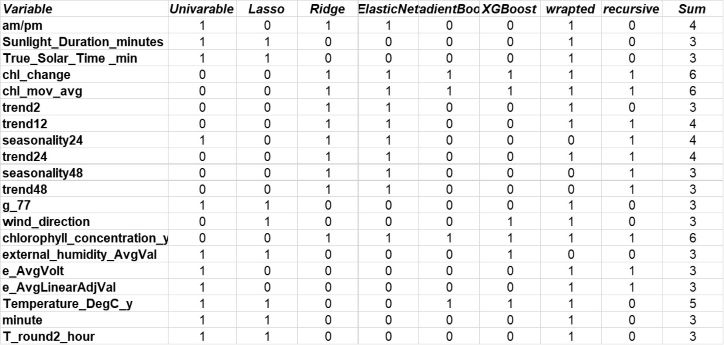

In [64]:
#creating a new df with the selected features that will be used for the model selection. 
new_feat=final_df_drop[['am/pm','Sunlight_Duration_minutes',
 'True_Solar_Time _min','chl_change', 'chl_mov_avg', 'seasonality2','trend2', 'seasonality12', 'trend12',
       'seasonality24', 'trend24', 'seasonality48', 'trend48', 'g_77','wind_direction', 'external_humidity_AvgVal','Temperature_DegC_y',
       'chlorophyll_concentration_y', 'e_AvgVolt', 'e_AvgLinearAdjVal','minute',
 'T_round2_hour']]

In [65]:
#new_feat.to_csv("C:/Users/dalit/DataScience/project/final_project/new_feat.csv")

In [66]:
#creating a new df with the selected features (not including the outcome related features) that will be used for the second 
#model selection. 
new_feat_noChl=final_df_drop[['am/pm','Sunlight_Duration_minutes',
 'True_Solar_Time _min', 'seasonality2', 'seasonality12',
       'seasonality24',  'seasonality48', 'g_77','wind_direction', 'external_humidity_AvgVal','Temperature_DegC_y',
       'e_AvgVolt', 'e_AvgLinearAdjVal','minute',
 'T_round2_hour']]

In [67]:
# new_feat_noChl.to_csv("C:/Users/dalit/DataScience/project/final_project/new_feat_noChl.csv")